In [2]:
from google.colab import files
uploaded = files.upload()


Saving usa_county_wise.csv to usa_county_wise (1).csv
Saving worldometer_data.csv to worldometer_data (1).csv
Saving country_wise_latest.csv to country_wise_latest (1).csv
Saving covid_19_clean_complete.csv to covid_19_clean_complete (1).csv
Saving day_wise.csv to day_wise (1).csv
Saving full_grouped.csv to full_grouped (1).csv


Dataset Loaded Successfully
Shape: (49068, 10)

Columns: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


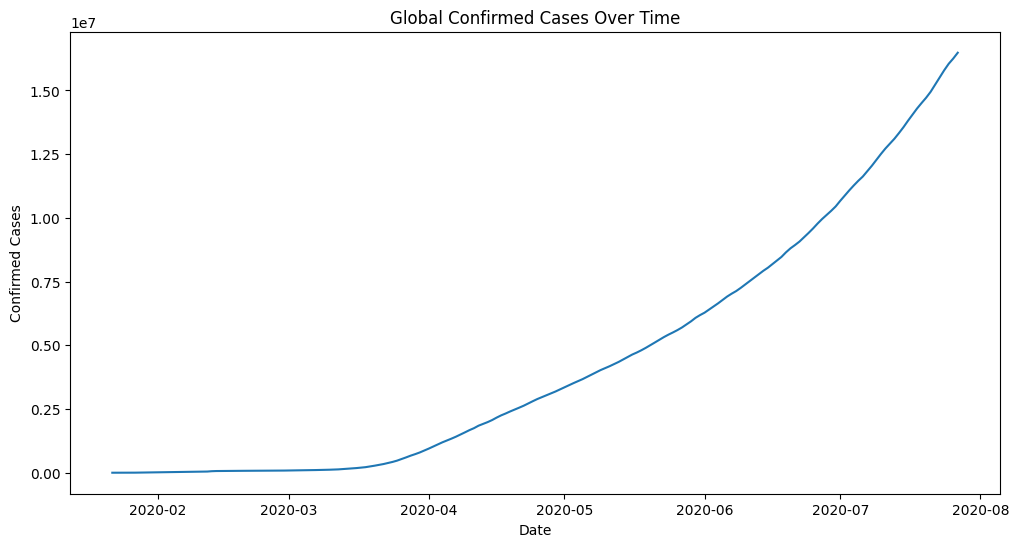

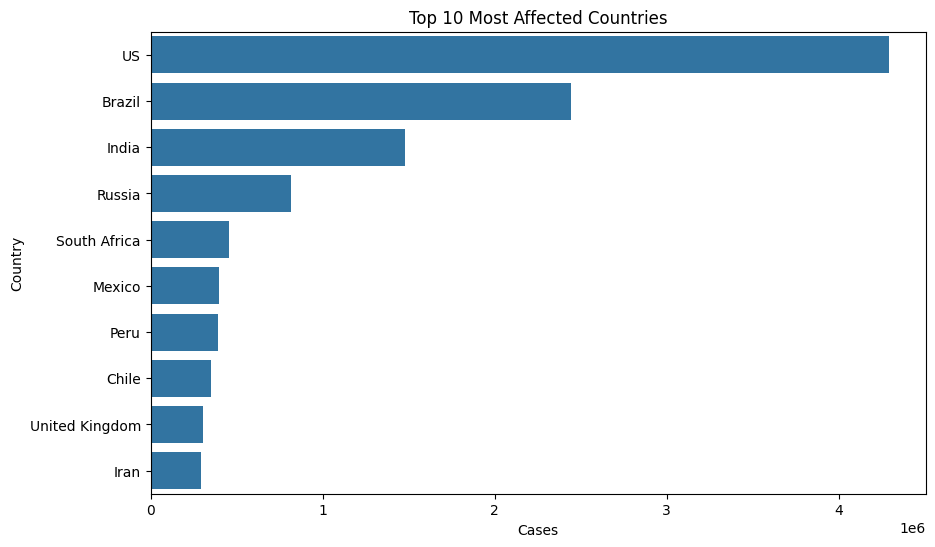

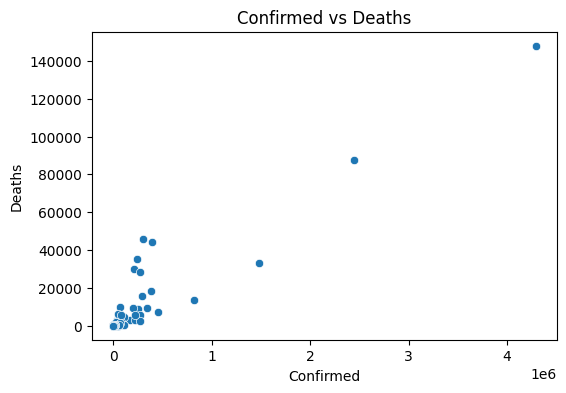

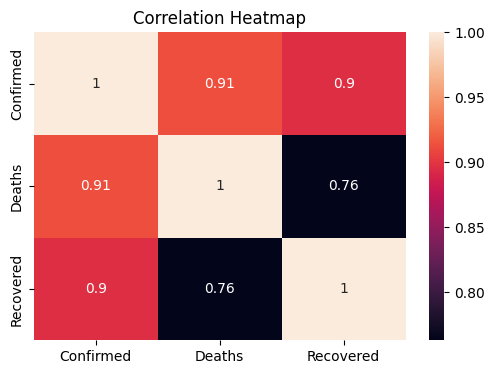


Project Analysis Completed Successfully


In [3]:
# ===============================
# COVID-19 DATA ANALYSIS PROJECT
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load main dataset
df = pd.read_csv("covid_19_clean_complete.csv")

print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print("\nColumns:", df.columns)

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# ===============================
# Global cases over time
# ===============================

global_data = df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()

plt.figure(figsize=(12,6))
plt.plot(global_data.index, global_data['Confirmed'])
plt.title("Global Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.show()

# ===============================
# Top 10 countries
# ===============================

latest = df[df['Date'] == df['Date'].max()]

top10 = latest.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Most Affected Countries")
plt.xlabel("Cases")
plt.ylabel("Country")
plt.show()

# ===============================
# Death vs Recovered
# ===============================

plt.figure(figsize=(6,4))
sns.scatterplot(x='Confirmed', y='Deaths', data=latest)
plt.title("Confirmed vs Deaths")
plt.show()

# ===============================
# Correlation heatmap
# ===============================

plt.figure(figsize=(6,4))
sns.heatmap(df[['Confirmed','Deaths','Recovered']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

print("\nProject Analysis Completed Successfully")
